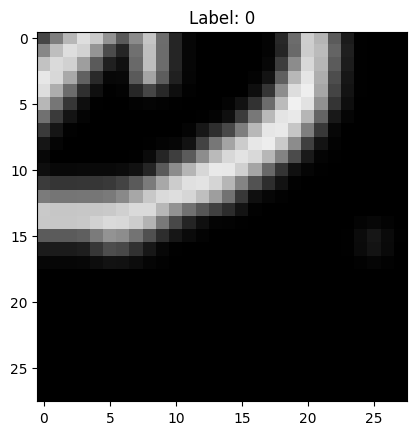

In [156]:
import torch
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from PIL import Image

# Define the transform to resize the image and convert it to a tensor
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize to 224x224 pixels
    transforms.RandomResizedCrop(28, scale=(1.0, 1.0)),
    transforms.Grayscale(num_output_channels=3),  # Convert to 3 channels
    transforms.ToTensor()
])

# Load MNIST dataset
mnist_dataset = torch.utils.data.DataLoader(
    torchvision.datasets.MNIST(root=r'D:\omer\i-jepa\ijepa\src\datasets\mnist', train=True, download=False, transform=transform),
    batch_size=1, shuffle=True
)

# Get one sample
images, labels = next(iter(mnist_dataset))
image = images[0]

# Convert tensor to PIL Image for display
image = transforms.ToPILImage()(image)

# Display the image
plt.imshow(image)
plt.title(f'Label: {labels[0]}')
plt.show()


In [28]:
import torchvision
import torchvision.transforms as transforms

def download_mnist(save_directory):
    """
    Download and save the MNIST dataset.

    :param save_directory: Directory where the MNIST dataset will be saved.
    """
    # Define a transform to normalize the data
    transform = transforms.Compose([transforms.ToTensor(),
                                    transforms.Normalize((0.5,), (0.5,))])

    # Download the MNIST training data
    train_set = torchvision.datasets.MNIST(root=save_directory,
                                           train=True,
                                           download=True,
                                           transform=transform)

    # Download the MNIST test data
    test_set = torchvision.datasets.MNIST(root=save_directory,
                                          train=False,
                                          download=True,
                                          transform=transform)

    print("MNIST dataset downloaded in:", save_directory)

# Example usage
download_mnist(r'D:\omer\i-jepa\ijepa\src\datasets\mnist')


100.0%


Extracting D:\omer\i-jepa\ijepa\src\datasets\mnist\MNIST\raw\train-images-idx3-ubyte.gz to D:\omer\i-jepa\ijepa\src\datasets\mnist\MNIST\raw



100.0%


Extracting D:\omer\i-jepa\ijepa\src\datasets\mnist\MNIST\raw\train-labels-idx1-ubyte.gz to D:\omer\i-jepa\ijepa\src\datasets\mnist\MNIST\raw



100.0%


Extracting D:\omer\i-jepa\ijepa\src\datasets\mnist\MNIST\raw\t10k-images-idx3-ubyte.gz to D:\omer\i-jepa\ijepa\src\datasets\mnist\MNIST\raw



100.0%

Extracting D:\omer\i-jepa\ijepa\src\datasets\mnist\MNIST\raw\t10k-labels-idx1-ubyte.gz to D:\omer\i-jepa\ijepa\src\datasets\mnist\MNIST\raw

MNIST dataset downloaded in: D:\omer\i-jepa\ijepa\src\datasets\mnist


Visualizing dataloader

In [1]:
import sys
import os
# Add the parent directory to sys.path
script_dir = os.path.dirname("D:\\omer\\i-jepa\\ijepa\\src\\datasets\\check_data.ipynb")  # Get the directory where the script is located
parent_dir = os.path.dirname(script_dir)  # Get the parent directory
parent_dir2 = os.path.dirname(parent_dir)  # Get the parent directory
sys.path.insert(0, parent_dir)
sys.path.insert(0, parent_dir2)
from transforms import make_transforms
import argparse



In [3]:
from src.datasets.imagenet1k import make_imagenet1k
from src.transforms import make_transforms
from src.masks.multiblock import MaskCollator as MBMaskCollator


In [4]:
# hyper-params


In [8]:
# -- make data transforms
mask_collator = MBMaskCollator(
    input_size=224,
    patch_size=14,
    pred_mask_scale=(0.15, 0.2),
    enc_mask_scale=(0.85, 1.0),
    aspect_ratio=(0.75, 1.5),
    nenc=1,
    npred=4,
    allow_overlap=False,
    min_keep=10)

transform = make_transforms(
    crop_size=224,
    crop_scale=(0.3, 1.0),
    gaussian_blur=False,
    horizontal_flip=False,
    color_distortion=False,
    color_jitter=False)

# -- init data-loaders/samplers
_, unsupervised_loader, unsupervised_sampler = make_imagenet1k(
        transform=transform,
        batch_size=1,
        collator=mask_collator,
        pin_mem=True,
        training=True,
        num_workers=0,
        world_size=1,
        rank=0,
        root_path="D:/omer/i-jepa/ijepa/src/datasets/mnist",
        image_folder="imagenet_full_size/061417/",
        copy_data=False,
        drop_last=True)
ipe = len(unsupervised_loader)

In [9]:
d = next(iter(unsupervised_loader))


In [10]:
img, maskA, maskB = d

In [252]:
data = iter(unsupervised_loader)

torch.Size([1, 3, 224, 224])
torch.Size([1, 146])
torch.Size([1, 48])
tensor([[  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
          14,  16,  24,  25,  26,  27,  28,  29,  30,  32,  40,  41,  42,  43,
          44,  45,  46,  48,  56,  57,  58,  59,  60,  61,  62,  64,  73,  74,
          75,  76,  77,  78,  80,  89,  90,  91,  92,  93,  94,  96, 105, 106,
         107, 108, 109, 110, 112, 121, 122, 123, 124, 125, 126, 128, 137, 138,
         139, 140, 141, 142, 144, 145, 146, 153, 154, 155, 156, 157, 158, 160,
         161, 162, 169, 170, 171, 172, 173, 174, 176, 177, 178, 185, 186, 187,
         188, 189, 190, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202,
         203, 204, 205, 206, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217,
         218, 219, 220, 221, 222, 224, 225, 226, 227, 228, 229, 230, 231, 232,
         233, 234, 235, 236, 237, 238]])
tensor([[ 67,  68,  69,  70,  71,  72,  83,  84,  85,  86,  87,  88,  99, 100,
         101, 102, 1

(-0.5, 223.5, 223.5, -0.5)

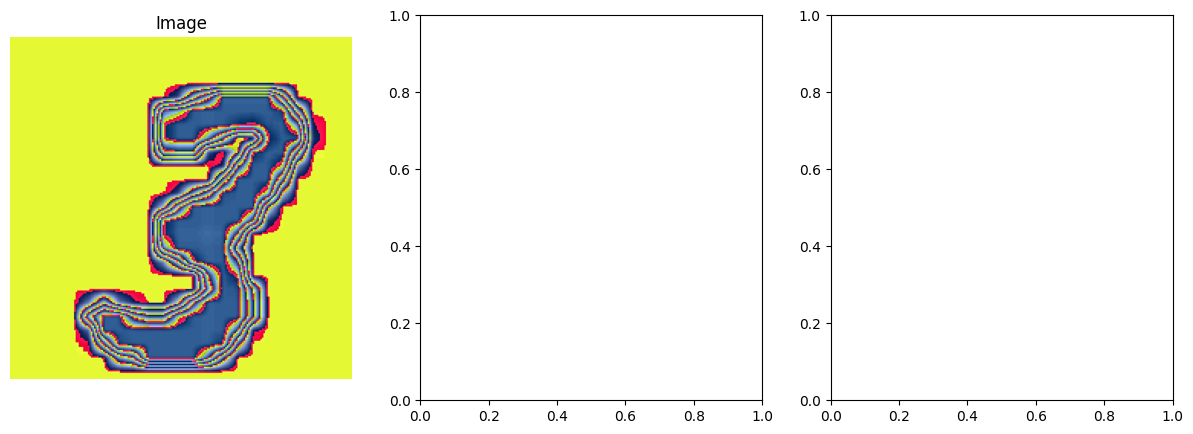

In [297]:
from PIL import Image
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
# Convert tensor to PIL Image for display


d = next(data)
d = next(data)
d = next(data)

img, maskA, maskB = d
# print(img[0].shape)

# Converting tensors to PIL Images for display
image = transforms.ToPILImage()(img[0][0,:,:,:])
print(img[0].shape)
print(maskA[0].shape)
print(maskB[0].shape)
print(maskA[0])
print(maskB[3])
# maskA_image = transforms.ToPILImage()(maskA[0][0,:,:])
# maskB_image = transforms.ToPILImage()(maskB[0][0,:,:,:])

# Displaying the images using subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(image)
axs[0].set_title('Image')
axs[0].axis('off')

# axs[1].imshow(maskA_image, cmap='gray')
# axs[1].set_title('Mask A')
# axs[1].axis('off')

# axs[2].imshow(maskB_image, cmap='gray')
# axs[2].set_title('Mask B')
# axs[2].axis('off')

# plt.show()